# PHYS 3310 Lab Notebook
## Ryan Gale

## Table of Contents
#### Lab 1: Transmission Lines and Radiation Resistance
1. Lab Setup 1/24/19 
2. Capacitor Impedance Data Collection 1/29/19
3. Transmission Line Data Collection 1/31/19
4. Antenna Radiation Resistance Data Collection 1/31/19
5. Capacitor Error Analysis 2/5/19 
6. Transmission Line Error Analysis 2/7/2019

## Lab 1: Transmission Lines and Radiation Resistance

### 1 Lab Setup

Starting up the Vector Network Analyzer (VNA):
Calibrate -> Create
Read Open -> Update
Now the VNA is calibrated, we can connect a device via the Device Under Test input
To read the device analysis press Single.  Use Freerun to produce live data.

The transmission line was measured at 214 +/- 1 cm long as opposed to the 614 cm stated in the introductory notes.
There are interesting peaks in the observed impedance vs frequency. 

Final Thoughts:
I need to read Bekefi and Barrett to learn more about this impedance behavior...

### 2 Capacitor Impedance Data Collection

#### Alligator Clips

Alligator clips display a decaying reactance and resistance approaching very high frequencies as we expect.  However neither are strictly decreasing from small frequency, there is a peak in both measurements.  I am not sure what this peak is from, maybe the poor connection of the alligator clip is causing interference in the circuit.  I will investigate further.

Here are the observed Resistance and Reactance of the 56 +/- 5% picofarad capacitor. Batch one of measurements produced the following:

<img src="Alligator Clip.jpg" alt="drawing" width="500"/>

Because these results do not follow the expected $X=\frac{1}{\omega C}$ relation.  At certain frequency ranges lengths of wire can exhibit inductor behavior and these peak locations correspond to the length of wire exposed (due to where I connect the alligator clips.

I need to remeasure these results along with the length of exposed wire to determine the expected resonance...

Taking a 2 +/- 0.1 cm wire exposed between the capacitor and the alligator clips produced the following:

<img src="inductor1.jpg" alt="drawing" width="500"/>


#### Binding Posts
I predict that the binding post attachment will give the best results because it provides a stronger connection between the circuit elements.

Here are the results I observed:

<img src="Binding Posts.jpg" alt="drawing" width="500"/>

The fluctuation in resistance is due to such a low frequency.  The reactance is clearly the main contributor to impedance.  Although it appears to be following the expected $X=\frac{1}{\omega C}$ relation well, at around 150 MHz the Reactance mysteriously increases.  I believe this may be new physics outside of the domain described by the above equation.  Further exploration to ensue.

### 3 Transmission Line Data Collection

After calibrating the VNA I attached the 214 +/- 1 cm long transmission line and read the following impedance with an open end:

<img src="tran line open1.jpg" alt="drawing" width="500"/>

These results are intuitive, after reaching the end of the line the current is reflected and causes interference.  The distance between interference spikes look evenly spaced from afar but I hope to quantify this when I do my analysis.

With a 50 +/-0.5 Ohm resistor I predict the interference pattern will be gone and we get a sinusoidal wave (predicted by Bekefi and Barrett pg 348-349).  My results verify my intuition:

<img src="Tran line closed1.jpg" alt="drawing" width="500"/>

This data looks very good to me, the oscillation frequency looks fairly constant with decay in amplitude (due to energy loss).  

Next I hope to collect data on a shorted transmission line.  Bekefi and Barrett predict a tan function (pg 349) and this is what I'm getting:

<img src="tran line shorted.jpg" alt="drawing" width="500"/>

This looks a lot like the $Z_L=jZ_0 tan(kl)$ relation predicted by theorists.  I will need to compute the variance to get more precise correlation (see error analysis section).


### 4 Antenna Radiation Resistance Data Collection
To isolate the antenna from metal I placed it ontop of a cardboard box near the window behind the lab computer.  The results looked a lot better than the ones I observed on top of the transmission line coil.  

#### Folded Up Configuration

For this orientation I measured 3 +/-0.1 cm separation at the base and 7.4 +/- 0.1 cm separation at the top.  The impedance and resistance both peaked around 120. MHz but otherwise showed a similar decay as the capacitor with binding posts.  

<img src="up1.jpg" alt="drawing" width="500"/>


#### Spread Out Configuration

Spreading out the antennas showed a decrease in the resonance peak.  It spread out and shows why it's very hard to pick up a radio signal on a poorly configured antenna.  

<img src="out R+Z1.jpg" alt="drawing" width="500"/>

<img src="out R+X1.jpg" alt="drawing" width="500"/>

The resonance appears to be around 75 MHz (where the reactance, 2nd plot, goes to zero).

### 5 Capacitor Error Analysis

First I will investigate the variance of the reactance of the capacitor.  My plot below (red line is reactance):

<img src="Binding Posts.jpg" alt="drawing" width="400"/>


In [1]:
import math
import csv
f = open('binding_post_reactance.csv', 'r', encoding="utf8")
reader = csv.reader(f)
headers = next(reader, None)
headers

['Frequency', ' Return_Loss', ' Phase', ' Rs', ' SWR', ' Xs', ' Z']

In [2]:
# format and convert necessary data points to float
column = {}
for h in headers:
    column[h] = []

column
for row in reader:
    for h, v in zip(headers, row):
        column[h].append(v)

freq = []
for f in column['Frequency']:
    freq.append(float(f))

X = []
for x in column[' Xs']:
    X.append(float(x))

theory = []
for f in freq:
    theory.append(1./(2*math.pi*56*10**(-12)*f))
    
# The 56pf capacitor has 5% error so let's see what the upper and lower bound plots look like
upper = []
for f in freq:
    upper.append(1./(2*math.pi*(56+.05*56)*10**(-12)*f))
    
lower = []
for f in freq:
    lower.append(1./(2*math.pi*(56-.05*56)*10**(-12)*f))

In [3]:
# the low and high end frequency values produced reactance that greatly varied from theory. 
# I adjust my sample space to the data points that look closest to an inverse relation.
freq = freq[25:]
X = X[25:]
theory = theory[25:]
upper = upper[25:]
lower = lower[25:]

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as p
p.ylim(0, 600)
p.ylabel('$X$')
p.xlabel('$f$')
p.suptitle('$Capacitor$ $Reactance$')
p.plot(freq, X,'blue', label='$Observed$')
p.plot(freq, theory,'black', label='$Theory$')
p.plot(freq, upper,'red', label='$Upper-Bound$ $Error$')
p.plot(freq, lower,'purple', label='$Lower-Bound$ $Error$')

p.legend(bbox_to_anchor=(.98, .98), loc=0, borderaxespad=0.)

In [5]:
def variance(observed, theory):
    observed = observed
    theory = theory
    ans = 0
    for i in range(0,len(observed)):
        ans += (observed[i] - theory[i])**2
    return ans/len(observed)

In [6]:
variance(X,theory)

2241.0431678781392

Theory predicts a relation $X=\frac{1}{\omega C}$ and the observed variance does not match!  There is an inductor effect in the wire connecting the capacitor and VNA.  We can see this resonance start to increase the reactance at 75 MHz.  To see this effect more explicitly I'll take the residual of the theory and observed measurements.  I hypothesize a roughly linear relationship for the inductor.  

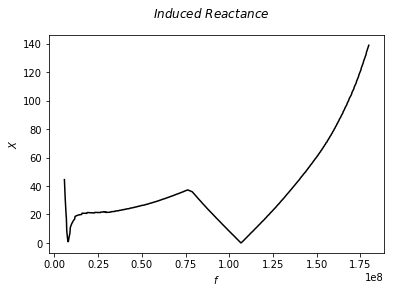

In [7]:
induced = []
for i in range(0,len(theory)):
    induced.append(abs(theory[i]-X[i]))

p.ylabel('$X$')
p.xlabel('$f$')
p.suptitle('$Induced$ $Reactance$')
p.plot(freq, induced,'black', label='$Observed$')

### 6 Transmission Line Error Analysis

Now I will investigate the impedance of the shorted transmission line.  My measurements below :

<img src="tran line shorted.jpg" alt="drawing" width="500"/>

Theory predicts $Z_L=jZ_0 tan(kl)$ but let's see what we're getting here.  I'm taking the arctan of observation and theory to make comparison easier.

In [8]:
f = open('shorted tran line.csv', 'r', encoding="utf8")
reader = csv.reader(f)
headers = next(reader, None)
headers 

['Frequency(Hz)', 'Return Loss(dB)', 'Phase(deg)', 'Rs', 'SWR', 'Xs', '|Z|']

In [9]:
# format and convert necessary data points to float
column = {}
for h in headers:
    column[h] = []

column
for row in reader:
    for h, v in zip(headers, row):
        column[h].append(v)

freq = []
for f in column['Frequency(Hz)']:
    freq.append(float(f))

Z = []
for x in column['|Z|']:
    Z.append(float(x))

theory = []
z0 = 75.
c = 2.99792*10**8
L = 2.14
for f in freq:
    k = (2*math.pi)/(c/f)
    theory.append(z0*abs(math.tan(k*L)))

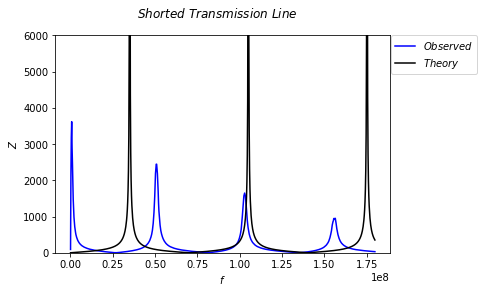

In [11]:
p.ylim(0, 6000)
p.ylabel('$Z$')
p.xlabel('$f$')
p.suptitle('$Shorted$ $Transmission$ $Line$')
p.plot(freq, Z,'blue', label='$Observed$')
p.plot(freq, theory,'black', label='$Theory$')
#p.plot(freq, upper,'red', label='$Upper-Bound$ $Error$')
#p.plot(freq, lower,'purple', label='$Lower-Bound$ $Error$')

p.legend(bbox_to_anchor=(1.26, 1), loc=0, borderaxespad=0.)
p.savefig('shorted.png',dpi=1000, bbox_inches='tight')